In [10]:
%matplotlib inline
import numpy as np
import quaternion
import math

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import subprocess
import os

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.collections import PolyCollection

plt.style.use('default_colors.mplstyle')

In [11]:
# укажем директорию, в которую будем 
# сохранять сгенерированные картинки
FOLDER = 'hiphop2d'
try:
    os.mkdir(FOLDER)
except FileExistsError:
    pass

In [12]:
# Вершины и грани (faces) в виде треугольников
V = []
F = []

with open(file='pug.obj', mode='r', encoding='utf-8') as f:
    for line in f.readlines():
        if line.startswith('#'):
            continue
        values = line.split()
        if not values:
            continue
        # вершины
        if values[0] == 'v':
            V.append(np.asarray(values[1:4], dtype=float))
        elif values[0] == 'f':
#            F.append(np.asarray(values[1:4], dtype=int))
            F.append(np.asarray([v.split('/')[0] for v in values[1:4]], dtype=int))

V = np.array(V)
# Для использования F в качестве индексов для массива V надо из 
# всех элементов F вычесть 1
F = np.array(F)-1

V = (V - 0.5*(V.max(axis=0) + V.min(axis=0))) / max(V.max(axis=0) - V.min(axis=0))

In [13]:
def rotate(X, α, U):
    u = np.normalized(np.quaternion(*U))
    q = math.cos(α/2) + math.sin(α/2)*u
    s = X.shape[0]
    X_new = np.zeros([s, 3])
    for i in range(s):
        quat = np.quaternion(0, X[i][0], X[i][1], X[i][2])
        quat_new = q*quat*q.conjugate()
        X_new[i] = quat_new.x, quat_new.y, quat_new.z
    return X_new

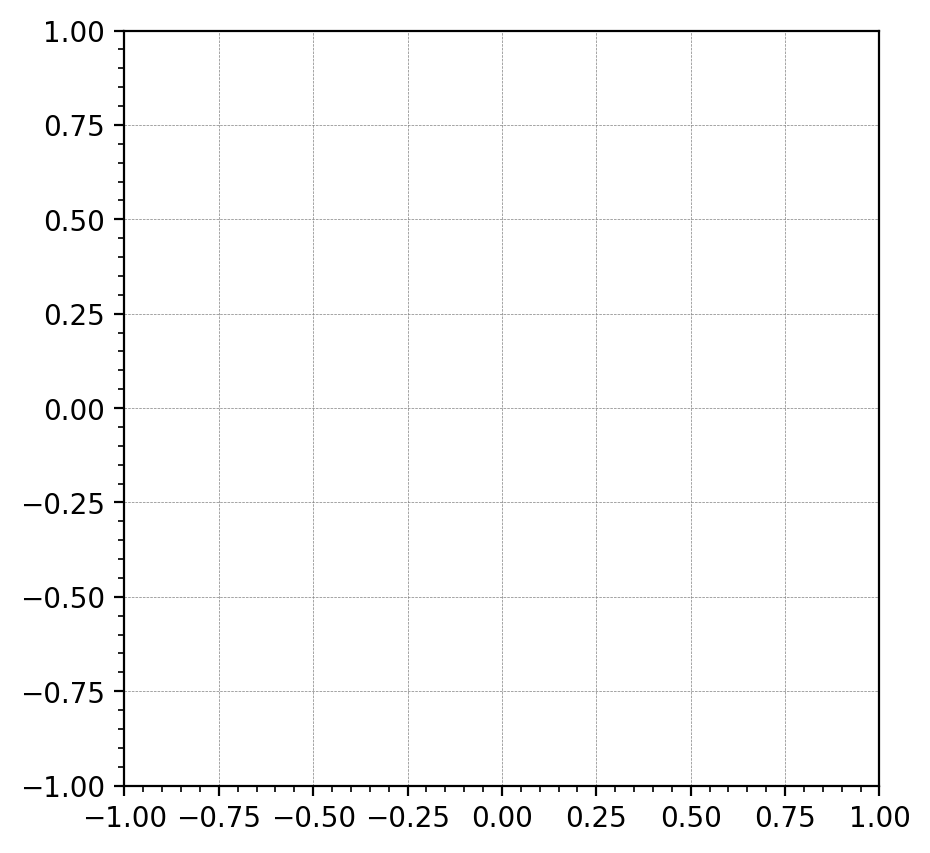

In [14]:
fig01 = plt.figure(num=1, figsize=(5, 5), dpi=200)
ax01 = fig01.add_subplot(1, 1, 1)

# Оформляем систему координат
ax01.set(xlim=(-1, 1), ylim=(-1, 1), aspect='equal')

U = np.array([0, 1, 0])

α = np.linspace(0, 2*math.pi, 100)

V_new = np.zeros([V.shape[0], 3])

for i in range(100):
    V_new = rotate(V, α[i], U)
    Polygons = V_new[F]
    
    collection = PolyCollection(Polygons[:, :, :2], closed=True,
                            linewidth=0.1, facecolor='None', edgecolor='black')
    
    ax01.add_collection(collection)
    
    fig01.savefig(f'{FOLDER}/{i:03d}.png', dpi=300, format='png')
    
    ax01.collections.pop()
    
    print('=', end='')

In [15]:
FFMPEG = 'D:\\ffmpeg\\bin\\ffmpeg.exe'

CMD = [FFMPEG, '-y', '-r', '30', '-f', 'image2', '-i', f'{FOLDER}/%03d.png',
       '-vcodec', 'libx264', '-crf', '25', '-pix_fmt', 'yuv420p', 'hiphop2d.mp4']
print(' '.join(CMD))

out = subprocess.run(CMD, capture_output=True)
print(out.stderr.decode('utf-8'))

D:\ffmpeg\bin\ffmpeg.exe -y -r 30 -f image2 -i hiphop2d/%03d.png -vcodec libx264 -crf 25 -pix_fmt yuv420p hiphop2d.mp4
ffmpeg version n4.4.1-2-gcc33e73618-20211107 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10-win32 (GCC) 20210610
  configuration: --prefix=/ffbuild/prefix --pkg-config-flags=--static --pkg-config=pkg-config --cross-prefix=x86_64-w64-mingw32- --arch=x86_64 --target-os=mingw32 --enable-gpl --enable-version3 --disable-debug --disable-w32threads --enable-pthreads --enable-iconv --enable-libxml2 --enable-zlib --enable-libfreetype --enable-libfribidi --enable-gmp --enable-lzma --enable-fontconfig --enable-libvorbis --enable-opencl --enable-libvmaf --enable-vulkan --disable-libxcb --disable-xlib --enable-amf --enable-libaom --enable-avisynth --enable-libdav1d --enable-libdavs2 --disable-libfdk-aac --enable-ffnvcodec --enable-cuda-llvm --disable-frei0r --enable-libglslang --enable-libgme --enable-libass --enable-libbluray --enable-libmp3lame --enable-libopus